In [1]:
import os
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
from sklearn.utils import shuffle
import pandas
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
test_0_path = './test'
#test_1_path = '../../21.10.17_心音数据处理/心音/按标签输出/test1_合并9'
list_of_folders = []
test_of_folders = []
test_of_folders.append(test_0_path)
#test_of_folders.append(test_1_path)

In [3]:
test_file = test_0_path + '/1.wav'
sample_rate, sig = scipy.io.wavfile.read(test_file)
print('sampling rate: ', sample_rate)
print('length of samples', len(sig))

sampling rate:  4000
length of samples 1080000


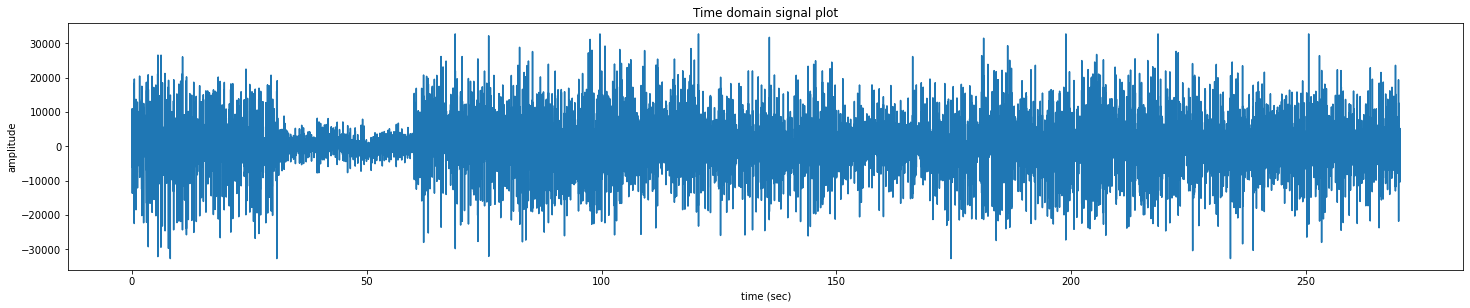

In [4]:
t = np.linspace(0, len(sig)/sample_rate, len(sig))
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(211)
ax1.set_xlabel("time (sec)")
ax1.set_ylabel("amplitude")
ax1.set_title("Time domain signal plot")
ax1.plot(t, sig)

In [5]:
def downsample(data, downsample_rate):
    trunc = int((data.shape[0] // downsample_rate) * downsample_rate)
    data = data[:trunc]
    x = signal.decimate(data[:].ravel(), downsample_rate)
    return x

In [6]:
downsample_rate = 8
downsampled_sig = downsample(sig, downsample_rate)

In [7]:
def loadDataset1(list_of_folders, max_signal_length, pre_emphasis = False, pre_emphasis_ratio = 0.79):
    num_files = 0
    for i in range(len(list_of_folders)):
        num_files = num_files + len(os.listdir(list_of_folders[i]))

    print("total number of files: ", num_files)
    x = np.zeros(shape = (num_files, max_signal_length//downsample_rate, 1))
    y = np.zeros(shape = (num_files, 1))

    labels = list(enumerate(list_of_folders))

    for i in range(0, len(list_of_folders)):
        files = os.listdir(list_of_folders[i])
        j = 0
        for file in files:
            y[i*4 + j] = int(labels[i][0])
            opened_file = list_of_folders[i] + '/' + file
            sample_rate, sig = scipy.io.wavfile.read(opened_file)
            print(opened_file)
            sig = downsample(sig, downsample_rate)
            if pre_emphasis == True:
                sig =  np.append(sig[0], sig[1:] - pre_emphasis_ratio * sig[:-1])
            x[i*4 + j, 0:len(sig),0] = sig
            j = j+1
    return x, y

In [8]:
from tensorflow.keras.models import load_model
model = load_model("test2_basicCNNhou.h5")

In [9]:
test_0_path = './test'
path_test = []
path_test.append(test_0_path)
data, labels = loadDataset1(list_of_folders= path_test , max_signal_length= 1080000, pre_emphasis = False)

total number of files:  5
./test/1.wav
./test/2.wav
./test/3.wav
./test/4.wav
./test/5.wav


In [10]:
maxVal = np.amax(np.abs(data))
data =data/maxVal
np.amax(data)
data.shape

(5, 135000, 1)

In [21]:
predict = model.predict(data)
predict = np.argmax(predict, axis=1)

In [22]:
print('The real label is：1,1,1,1,0',';  The predicted label is:',predict)

The real label is：1,1,1,1,0 ;  The predicted label is: [1 1 0 1 0]
